In [3]:
import pandas as pd
import numpy as np
from konlpy.tag import Twitter
from gensim.models import word2vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [5]:
twitter = Twitter()

In [6]:
train_data = pd.read_csv('data/ratings_train.txt', sep='\t')

In [7]:
train_data.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [9]:
len(train_data)

150000

In [10]:
train_data = train_data.dropna(axis=0)
len(train_data)

149995

In [11]:
toc_train_data = [twitter.pos(row[2], norm=True, stem=True, join=True) for row in train_data.itertuples()]

In [13]:
toc_train_data[0]

['아/Exclamation',
 '더빙/Noun',
 '../Punctuation',
 '진짜/Noun',
 '짜증나다/Adjective',
 '목소리/Noun']

In [15]:
model = word2vec.Word2Vec(toc_train_data, 
                          workers=4, # 병렬 처리 스레드 수
                          size=300, # 문자 벡터 차원 수
                         )

In [16]:
model.init_sims(replace=True)
model_name = '300features_text'
model.save(model_name)

In [17]:
vocab = list(model.wv.vocab)
xmatrix = model[vocab]

C:\Users\Sky\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [18]:
print(len(xmatrix))
print(xmatrix[0][:10])

15410
[ 0.04755292  0.05871652 -0.06779946  0.04141295  0.05023769 -0.08440003
  0.05310947 -0.06547225 -0.13596119 -0.05077866]


In [19]:
def search_k_means(X):
    sse = []
    for i in range(1, 21):
        km = KMeans(n_clusters=i, n_jobs=4, random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1, 21), sse, marker='o')
    

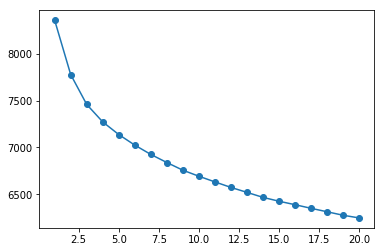

In [20]:
search_k_means(xmatrix)

In [21]:
k=10

In [22]:
model = KMeans(n_clusters=k, n_jobs=4, random_state=0)
model.fit(xmatrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
final_df = pd.DataFrame(model.predict(xmatrix))
final_df.columns=['predict']
final_df['vocab'] = pd.DataFrame(vocab)

In [24]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(xmatrix)

In [25]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [28]:
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/Arial.ttf").get_name()
rc('font', family=font_name)

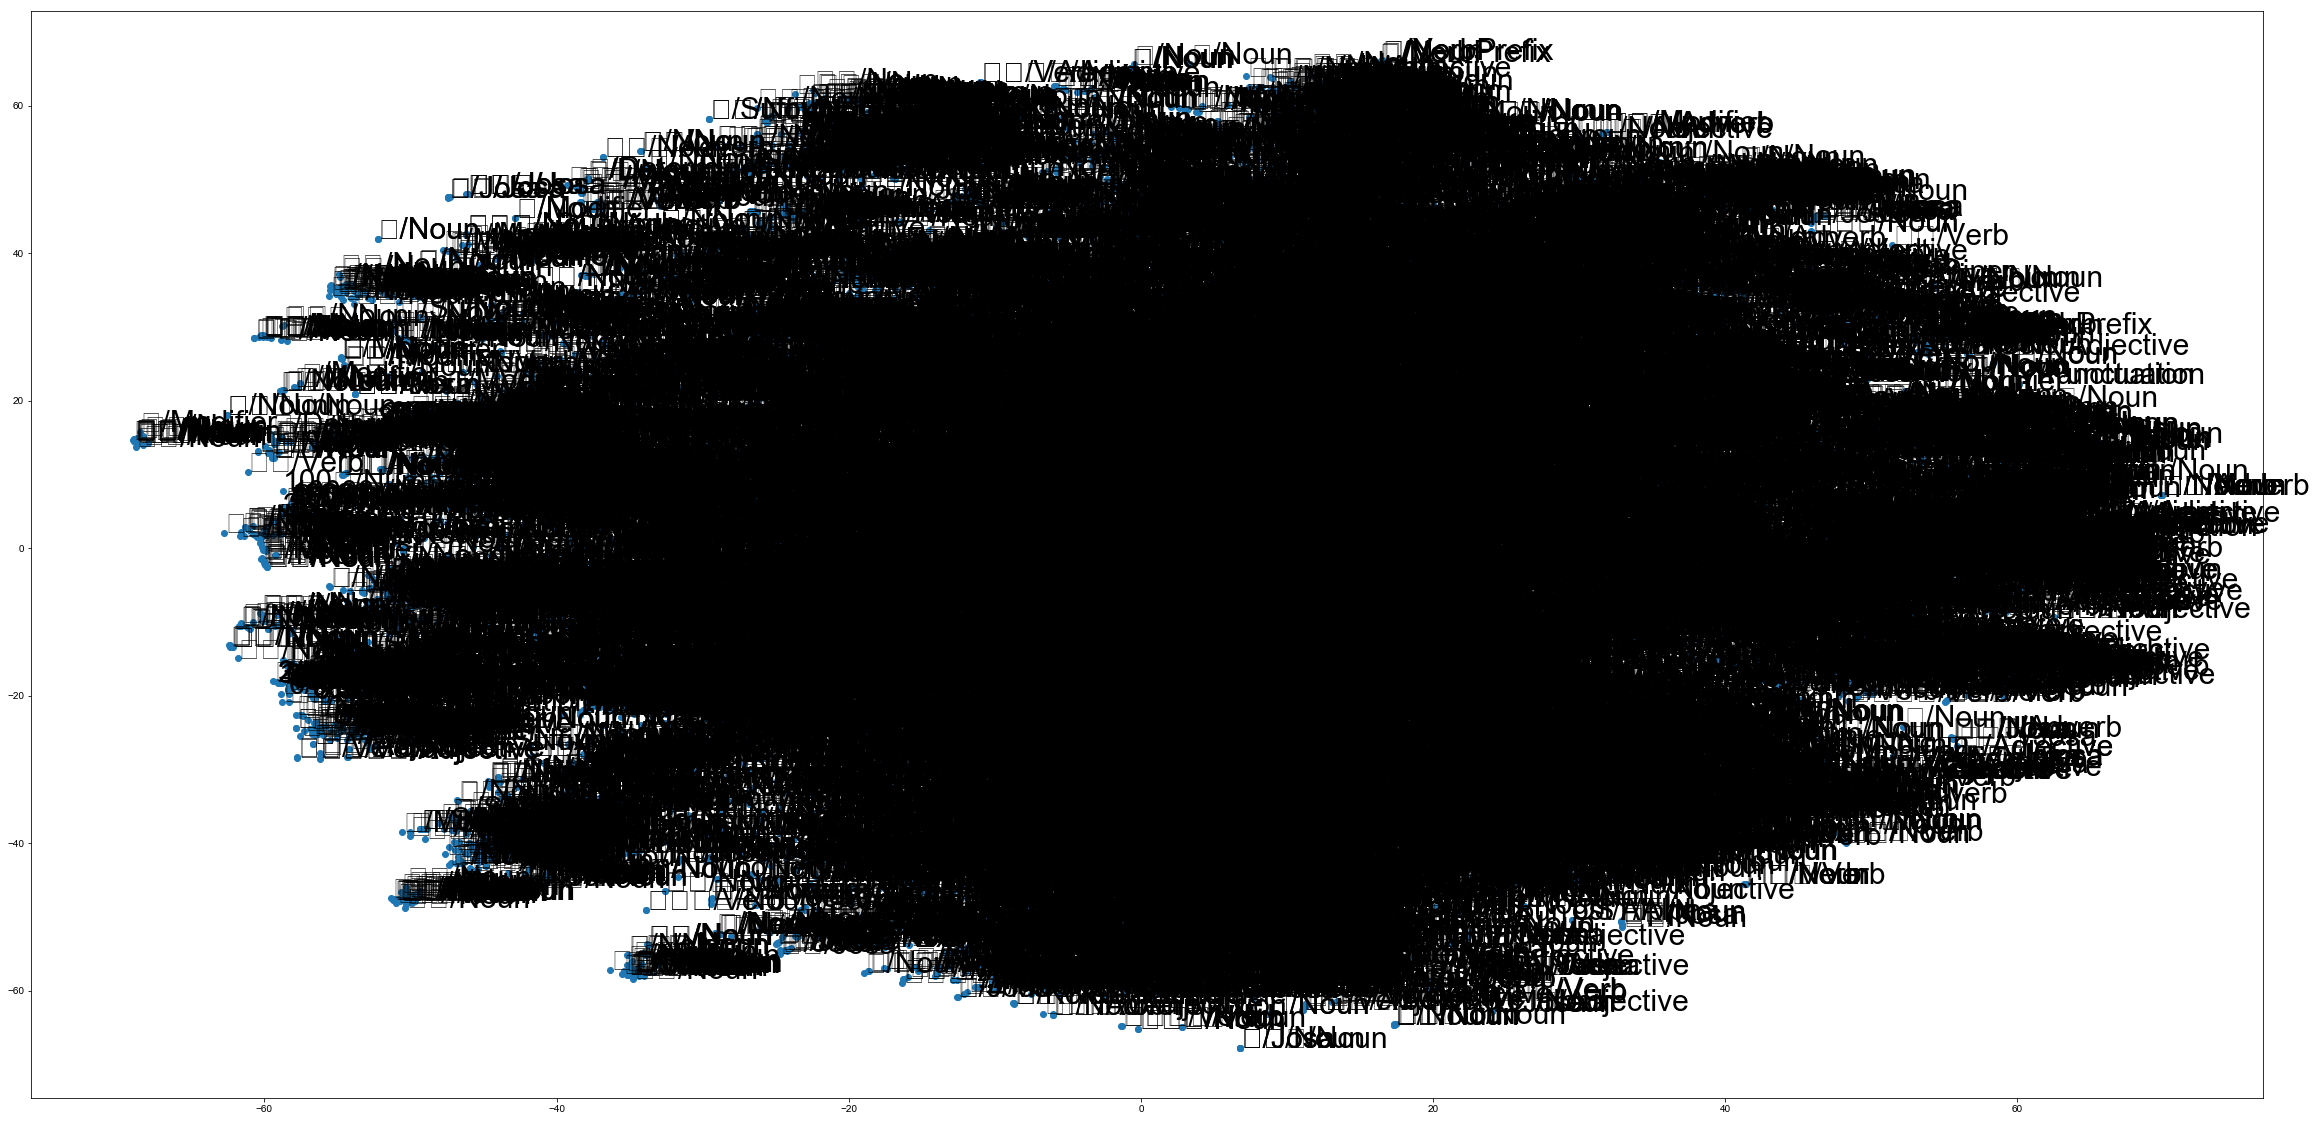

In [29]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()